## Changes in preindustrial-presentday DIC transport across the boundary - a comparison of 2 methods

## NOTEBOOK DESCRIPTION

Here we compare two methods for estimating anthropogenic carbon increase in SalishSeaCast model boundary conditions. One, based on direct observations of DIC increase by isopycnal, compiled by Ana Franco, is called the Ana Method. The other, based on an estimate of age of watermass based on local ventilation patterns, is called the Tetjana method. Summaries of both methods are as follows. In the last plot, we show a comparison of daily differences in transport of DIC using both methods.

## Ana method description:

    1) for each day of year 2015, calculate total volume transport of water by isopycnal for each isopycnal from 20.0- 27.0.

    2) for each isopycnal from 23.6 to 27+, Ana has estimated an nDIC increase per year. Multiply this value by 30 to get linear nDIC increase in the last 30 years for each isopycnal.
    
    3) multiply total vol transports (negative and positive, m3/s)by nDIC increase(mmol/m3/30yr) for each isopycnal to get DIC transport increase at each isopycnal. 
    
    4) plot a timeseries of the numbers obtained in 3).
    
## Tetjana method description:

    1) For each day of year 2015, obtain the boundary condition DIC difference (based on the watermass ventilation method described elsewhere - Tetjana_method_summary_notebook, these DIC differences are calculated in PLOT_DICdiff_Tetjanamethod)
    
    2) Multiply that DIC difference by the actual total volume transports (code in PLOT_DICdiff_Tetjanamethod, here we use a pickled .nc file) for that day
    
    3) plot a timeseries of the numbers obtained in 2).

In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
from __future__ import print_function
from numpy import *
from scipy import *
import netCDF4 as nc
import numpy as np
import scipy as sp
import seawater
import datetime as dt
import pandas as pd

""
from salishsea_tools import (
    nc_tools,
    viz_tools, 
    geo_tools,
    tidetools
)
import matplotlib.pyplot as plt
#matplotlib.use('Agg')
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
sys.path.append('/data/tjarniko/MEOPAR/tools/SalishSeaTools/salishsea_tools/')
import mocsy
import river_201702 as rv
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw
import datetime as dt

%matplotlib inline

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


### Ana method plots

In [5]:
# open the above calculations from netcdfs
dist_from_bdy = 1
daily_volumes = nc.Dataset('rho_stor_vol_stor_daily2015.nc')
pycnal_hist = nc.Dataset('pycnal_hist_stor_daily2015.nc')

pycnal_bins = pycnal_hist['pycnal_hist']['pycnal_bins']
pos_pycnal = pycnal_hist['pycnal_hist']['day_pospyc_stor']
neg_pycnal = pycnal_hist['pycnal_hist']['day_negpyc_stor']

In [6]:
cmap = cm.cm.thermal  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]


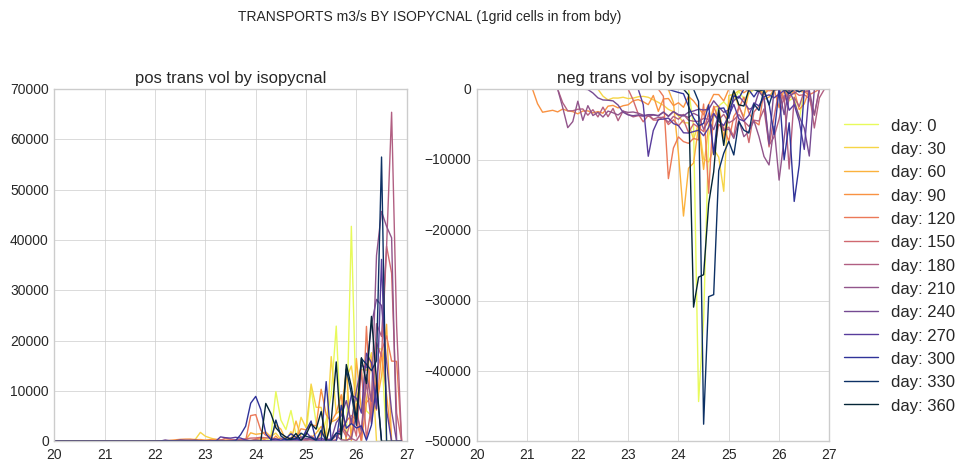

In [7]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
for i in range(0,365):
    if i%30 == 0:
        yrprop = int(((365-i) /(365)) * 256) -1
        ax.plot(pycnal_bins,pos_pycnal[i,:],linestyle = '-', color = cmaplist[yrprop], label = 'day: '+ str(i))
    ax.set_title('pos trans vol by isopycnal')
ax = fig.add_subplot(2,2,2)
for i in range(0,365):
    if i%30 == 0:
        yrprop = int(((365-i) /(365)) * 256) -1
        ax.plot(pycnal_bins,neg_pycnal[i,:],linestyle = '-', color = cmaplist[yrprop], label = 'day: '+ str(i))
ax.set_title('neg trans vol by isopycnal')
ax.legend(bbox_to_anchor=[1.2, 0.5], loc='center')

plt.suptitle('TRANSPORTS m3/s BY ISOPYCNAL ('+ str(dist_from_bdy) +
             'grid cells in from bdy)')

In [8]:
anas_ndic = pd.read_csv('./ana_ndic_trends.csv')
ana_pyc = anas_ndic['pycnal']
ana_ndic_inc = anas_ndic['ndic_inc']
ana_ndic_inc30 = anas_ndic['ndic_inc'] *30

#broadcast Ana's data onto our pycnal bins
pycnal_inc30 = np.zeros_like(pycnal_bins)
# print(pycnal_bins[36])
# print(ana_pyc[34])
pycnal_inc30[36:70] = ana_ndic_inc30[0:34]

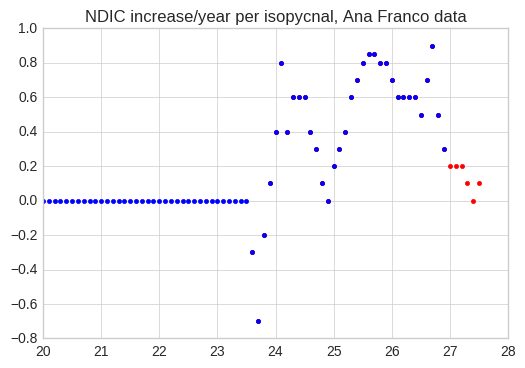

In [9]:
plt.plot(ana_pyc,ana_ndic_inc,'r.')
plt.plot(pycnal_bins,pycnal_inc30/30,'b.')
plt.title('NDIC increase/year per isopycnal, Ana Franco data')

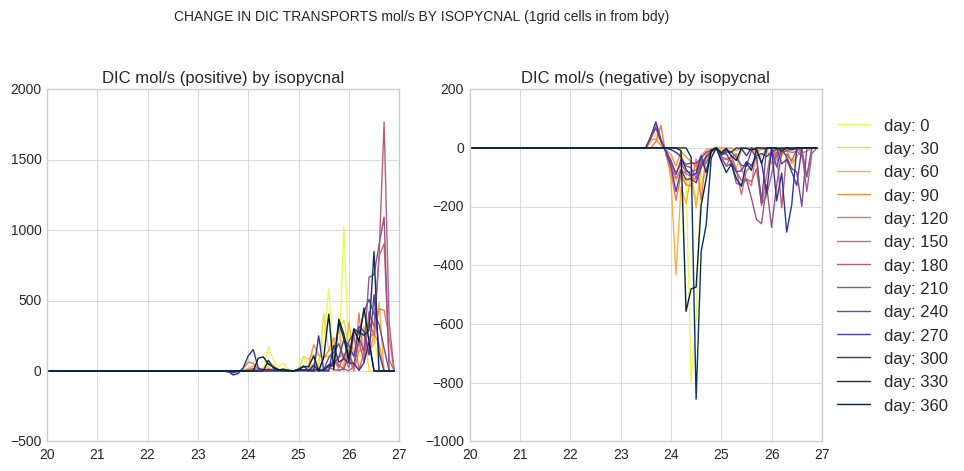

In [10]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
for i in range(0,365):
    if i%30 == 0:
        yrprop = int(((365-i) /(365)) * 256) -1
        ax.plot(pycnal_bins,pos_pycnal[i,:]*pycnal_inc30/1000,linestyle = '-', color = cmaplist[yrprop], label = 'day: '+ str(i))
    ax.set_title('DIC mol/s (positive) by isopycnal')
ax = fig.add_subplot(2,2,2)
for i in range(0,365):
    if i%30 == 0:
        yrprop = int(((365-i) /(365)) * 256) -1
        ax.plot(pycnal_bins,neg_pycnal[i,:]*pycnal_inc30/1000,linestyle = '-', color = cmaplist[yrprop], label = 'day: '+ str(i))
ax.set_title('DIC mol/s (negative) by isopycnal')
ax.legend(bbox_to_anchor=[1.2, 0.5], loc='center')

plt.suptitle('CHANGE IN DIC TRANSPORTS mol/s BY ISOPYCNAL ('+ str(dist_from_bdy) +
             'grid cells in from bdy)')

In [11]:
total_DICin_change = np.zeros(365)
total_DICout_change = np.zeros(365)

for i in range(0,365):
    dic_trans_in = pos_pycnal[i,:]*pycnal_inc30
    total_DICin_change[i] = np.sum(dic_trans_in)
    dic_trans_out = neg_pycnal[i,:]*pycnal_inc30
    total_DICout_change[i] = np.sum(dic_trans_out)

## Tetjana method Plots

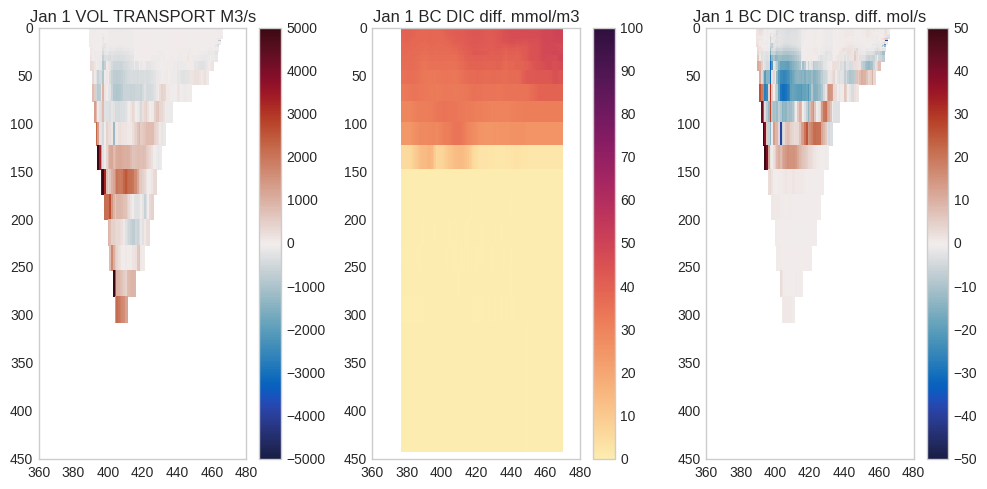

In [12]:
t_dir = '/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/PI_BOUND_COND/'


preind_nc = nc.Dataset(t_dir + 'preind_DIC/calculated_new_DIC_corrected' +
                  '/LO_corrected_y2015m01d01_preind_DIC.nc')

presday_nc = nc.Dataset('/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_'+
                       'y2015m01d01.nc')

preind_nc_DIC = preind_nc['preindustrial_DIC']['preind_dic']
presday_nc_DIC = presday_nc['DIC']
# preind_nc_TA = preind_nc['TA']
# presday_nc_TA = presday_nc['TA']

for i in range(0,10):
    preind_DIC_res = np.zeros([40,10,95])
    preind_DIC_res[:,i,:] = preind_nc_DIC[:,i*95:(i+1)*95]
    preind_DIC_res[preind_DIC_res ==0 ] = nan
    preind_mean_DIC = np.nanmean(preind_DIC_res,axis = 1)
    presday_DIC_res = np.zeros([40,10,95])
    presday_DIC_res[:,i,:] = presday_nc_DIC[0,:,0,i*95:(i+1)*95]
    presday_DIC_res[presday_DIC_res ==0 ] = nan
    presday_mean_DIC = np.nanmean(presday_DIC_res,axis = 1)
    
daily_vol = daily_volumes['vol_and_pycnal']['VOLtrans_stor_daily']
daily_rho = daily_volumes['vol_and_pycnal']['rho_stor_daily']
t_testU_BR = nc.Dataset('/results/SalishSea/hindcast.201812/01jan15/SalishSea_1d_20150101_20150101_grid_U.nc')
zlevels = t_testU_BR.variables['depthu']

dicdiff_bcs = np.zeros([40,898])
dicdiff_bcs[:,375:(375+95)] = (presday_mean_DIC - preind_mean_DIC)


fig = plt.figure(figsize=(10,5))

xst = 377
xen = 477
for i in range(1,4):
    ax = fig.add_subplot(1,3,i)
    section_slice = np.arange(xst,xen)
    if i == 1:
        ax.invert_yaxis()
        sd = daily_vol[0,:,xst:xen]
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.balance
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=-5000, vmax=5000 )
        ax.set_title('Jan 1 VOL TRANSPORT M3/s')
        cbar = fig.colorbar(mesh, ax=ax)


    if i == 2:
        ax.invert_yaxis()
        sd = dicdiff_bcs[:,xst:xen]
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.matter
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=0, vmax=100 )
        ax.set_title('Jan 1 BC DIC diff. mmol/m3')
        cbar = fig.colorbar(mesh, ax=ax)

    if i == 3:
        ax.invert_yaxis()
        sd = dicdiff_bcs[:,xst:xen]*daily_vol[0,:,xst:xen]/1000
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.balance
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=-50, vmax=50 )
        ax.set_title('Jan 1 BC DIC transp. diff. mol/s')
        cbar = fig.colorbar(mesh, ax=ax)
        
fig.tight_layout()

In [13]:
t = nc.Dataset('Tetjana_meth_trans_inout2.nc')
tetj_out = t['DIC_trans']['dic_out_diff'][:]
tetj_in = t['DIC_trans']['dic_in_diff'][:]

## Timeseries - comparison of methods

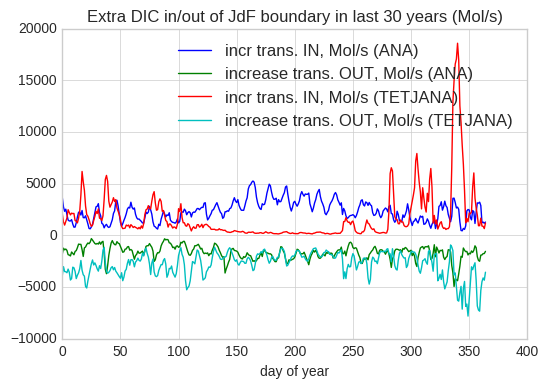

In [14]:
plt.title('Extra DIC in/out of JdF boundary in last 30 years (Mol/s)')
plt.plot(total_DICin_change/1000,label = 'incr trans. IN, Mol/s (ANA)')
plt.plot(total_DICout_change/1000, label = 'increase trans. OUT, Mol/s (ANA)')
plt.plot(tetj_in,label = 'incr trans. IN, Mol/s (TETJANA)')
plt.plot(tetj_out, label = 'increase trans. OUT, Mol/s (TETJANA)')

plt.legend()
plt.xlabel('day of year')


In [15]:
print('ANA')
print('extra Megamols in/out ')
print(np.sum(total_DICin_change/1000/1000))
print(np.sum(total_DICout_change/1000/1000))
print('TETJANA')
print('extra Megamols in/out ')
print(np.sum(tetj_in/1000))
print(np.sum(tetj_out/1000))

ANA
extra Megamols in/out 
857.089202625
-609.7852355625
TETJANA
extra Megamols in/out 
618.13306
-1026.3198
